# Electromagnetic Waves

This week, we will look at the prototype for time-dependent electromagnetic fields: the electromagnet plane wave.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Maxwell's Equations

In the absence of any sources — charges or currents — Maxwell's equations give ***wave equations*** for the electric and magnetic fields:

\begin{align*}
\nabla^2 \vec{E} - \dfrac{\epsilon\mu}{c^2} \dfrac{\partial^2 \vec{E}}{\partial t^2} &= 0 \\
\nabla^2 \vec{B} - \dfrac{\epsilon\mu}{c^2} \dfrac{\partial^2 \vec{B}}{\partial t^2} &= 0
\end{align*}

These descirbe waves that propagate with a speed of $v = c / \sqrt{\mu\epsilon}$.

Any function $f(\vec{r} \pm \vec{v} t)$ is a solution of the wave equation.

Maxwell's equation impose additional constraints.  In particular,

\begin{align*}
\nabla \times \vec{E} &= \dfrac{1}{c} \dfrac{\partial \vec{B}}{\partial t} \\
\nabla \times \vec{B} &= -\dfrac{\mu\epsilon}{c} \dfrac{\partial \vec{E}}{\partial t}
\end{align*}

## Plane Waves

One solution to the wave equation is a ***plane wave***:

$$
f(\vec{r},t) = A \, e^{i(\vec{k} \cdot \vec{r} - \omega t)}
$$

The wave equation requires that $\omega = vk$.  If each component of $\vec{E}$ and $\vec{B}$ has this form, we call it an electromagnetic plane wave.  Maxwell's equations give the following relations:

\begin{align*}
\vec{k} \cdot \vec{E} &= 0 \\
\vec{k} \times \vec{E} &= \dfrac{\omega}{c} \vec{B} \\
\vec{k} \cdot \vec{B} &=0 \\
\vec{k} \times \vec{B} &= - \dfrac{\mu \epsilon \omega}{c} \vec{E}
\end{align*}

Let's look at this class of solution.

In [51]:
# Define the material.
mu = 1
epsilon = 1
n = np.sqrt(mu*epsilon)

# Define the wave vector.
# Give magnitude, lattitude, and longitdue.
k = np.pi
theta = 0.00 * np.pi
phi = 0.00 * np.pi

kx = k * np.sin(theta) * np.cos(phi)
ky = k * np.sin(theta) * np.sin(phi)
kz = k * np.cos(theta)

omega = k/n

# Set time.
t0 = 0

# Define the electric field, magnetic field, and Poynting vector
# for an electromagnetic plane wave.

# Give initial direction of electric field.
# Everything else is determined by this.
E0 = 0.25
B0 = np.sqrt(epsilon*mu) * E0

thetaE = 1.00 * np.pi
phiE = 0.00 * np.pi

Ex0 = E0 * np.sin(thetaE) * np.cos(phiE)
Ey0 = E0 * np.sin(thetaE) * np.sin(phiE)
Ez0 = E0 * np.cos(thetaE)

# Set phase difference between electric and magnetic fields.
alpha = 0.0 * np.pi

# Create a grid.
box_size = 2
num_points = 11

s = np.linspace(-box_size, box_size, num_points)
X, Y, Z = np.meshgrid(s,s,s)

# Compute the fields on a grid.
Ex = Ex0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t0))
Ey = Ey0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t0)) * np.exp(1j*alpha)
Ez = Ez0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t0))

Bx = (ky*Ez - kz*Ey)/omega
By = (kz*Ex - kx*Ez)/omega
Bz = (kx*Ey - ky*Ex)/omega

Sx = 1/(8*np.pi*mu) * (Ey * Bz.conj() - Ez * By.conj())
Sy = 1/(8*np.pi*mu) * (Ez * Bx.conj() - Ex * Bz.conj())
Sz = 1/(8*np.pi*mu) * (Ex * By.conj() - Ey * Bx.conj())

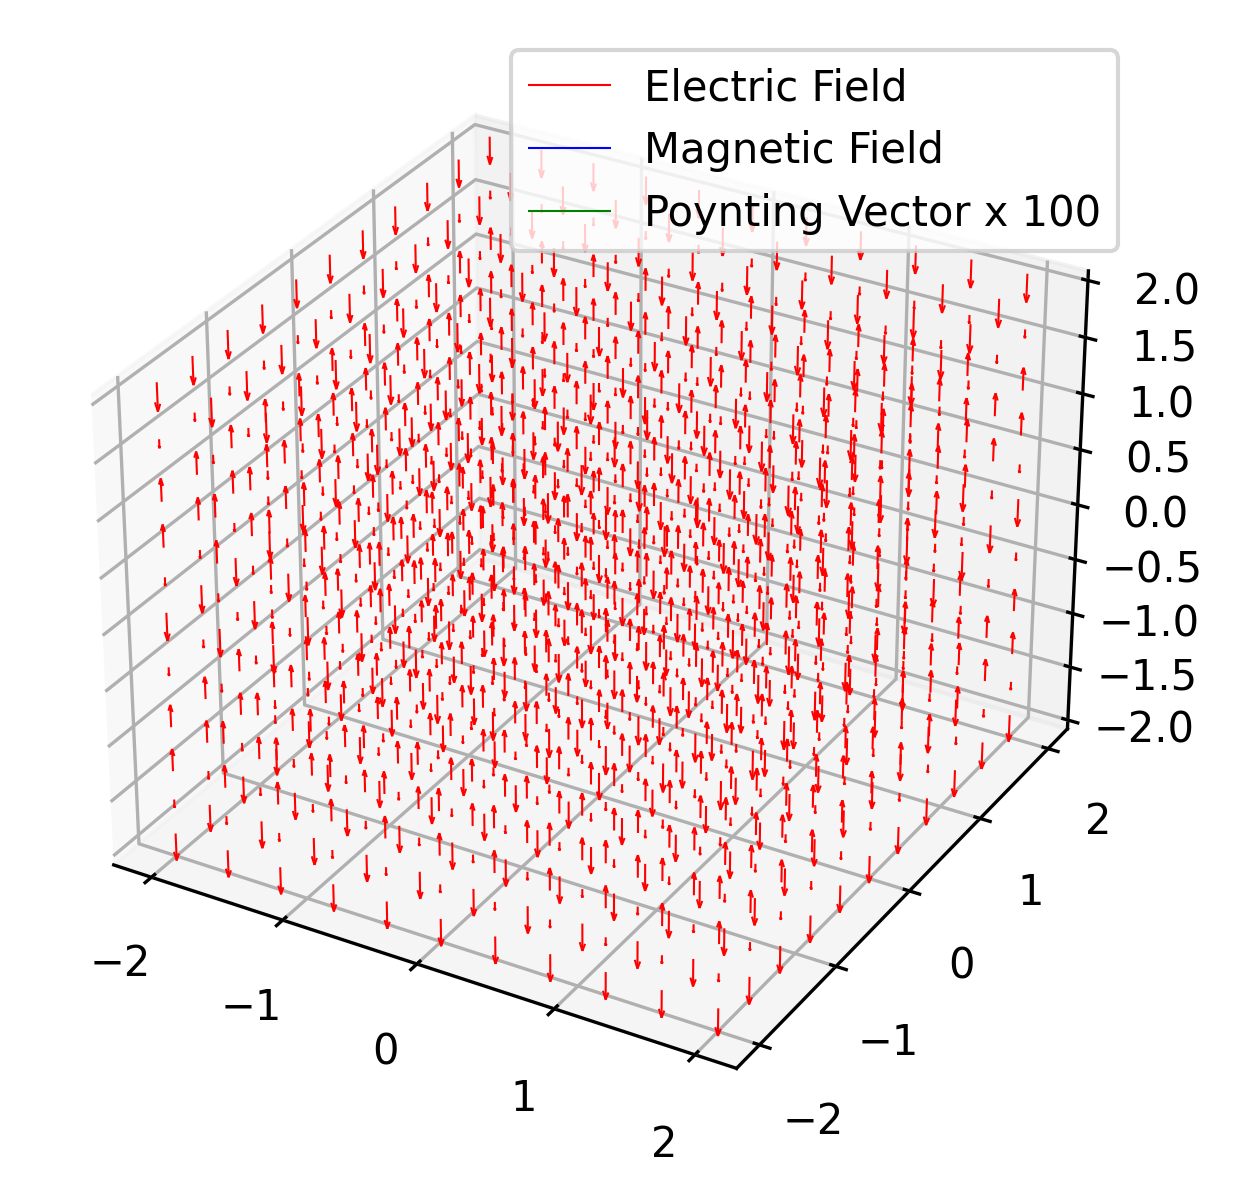

In [52]:
# Plot the field.
fig = plt.figure(dpi=300)
ax = fig.add_subplot(projection='3d')

ax.quiver3D(X,Y,Z, Ex.real, Ey.real, Ez.real, pivot='middle',
            linewidth=0.5, color='red', label='Electric Field')
ax.quiver3D(X,Y,Z, Bx.real, By.real, Bz.real, pivot='middle',
            linewidth=0.5, color='blue', label='Magnetic Field')
ax.quiver3D(X,Y,Z, 100*Sx.real, 100*Sy.real, 100*Sz.real, pivot='middle',
            linewidth=0.5, color='green', label='Poynting Vector x 100')
ax.legend()

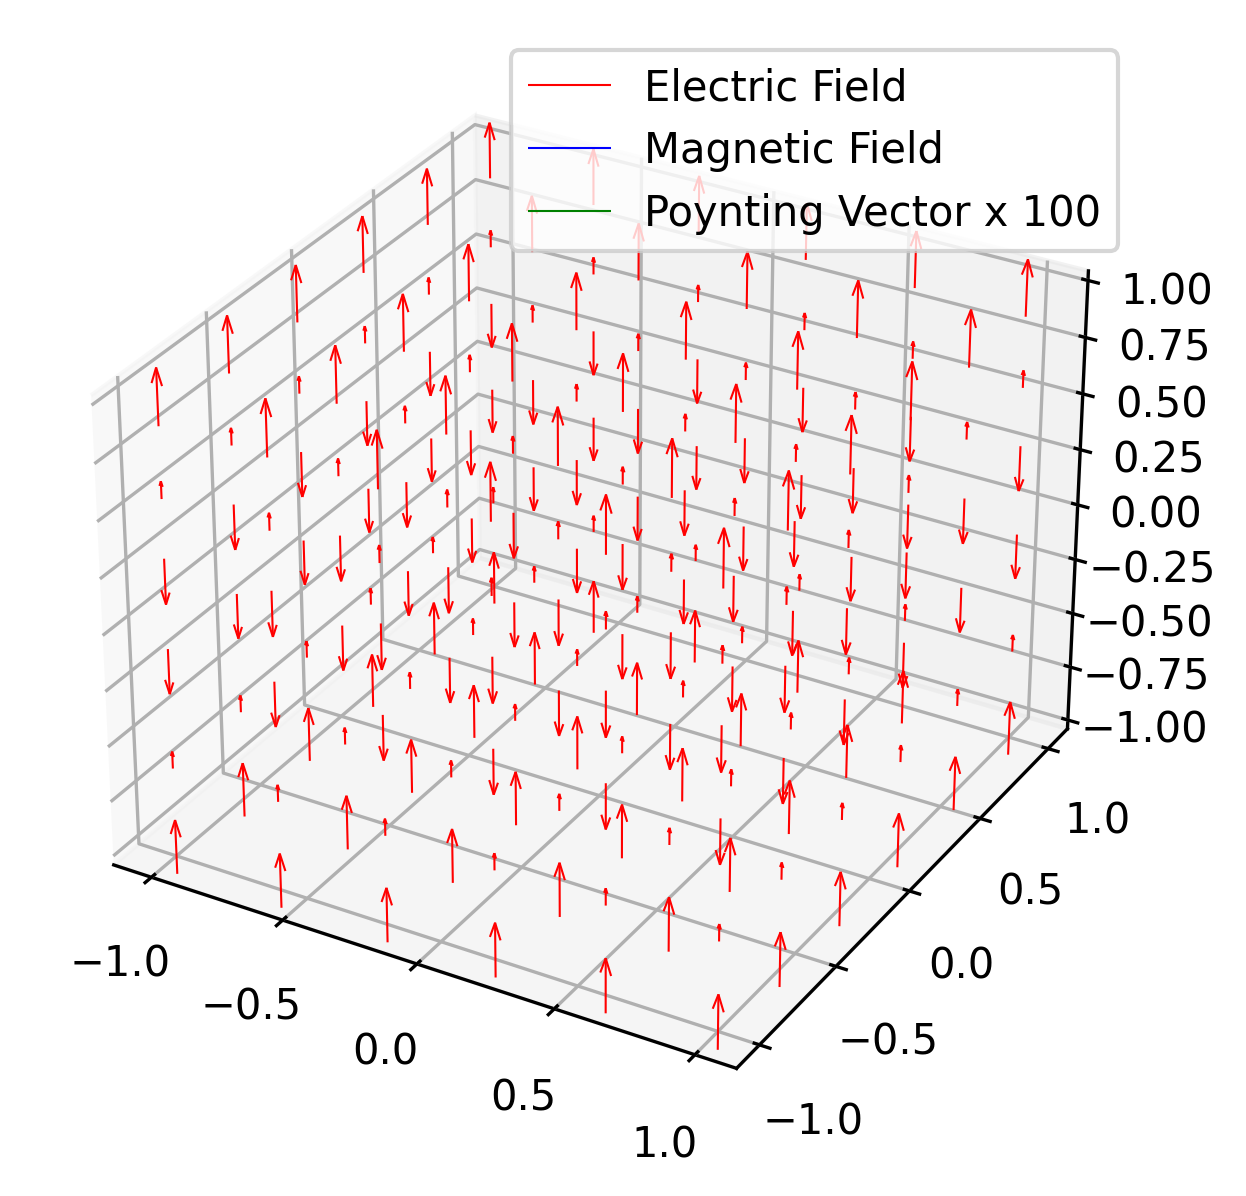

In [53]:
# Plot the field.
# Crop to see more detail.

# Create a grid.
box_size = 1
num_points = 6

s = np.linspace(-box_size, box_size, num_points)
X, Y, Z = np.meshgrid(s,s,s)

# Compute the fields on a grid.
ex = Ex0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t0))
ey = Ey0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t0)) * np.exp(1j*alpha)
ez = Ez0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t0))

bx = (ky*ez - kz*ey)/omega
by = (kz*ex - kx*ez)/omega
bz = (kx*ey - ky*ex)/omega

sx = 1/(8*np.pi*mu) * (ey * bz.conj() - ez * by.conj())
sy = 1/(8*np.pi*mu) * (ez * bx.conj() - ex * bz.conj())
sz = 1/(8*np.pi*mu) * (ex * by.conj() - ey * bx.conj())

# Make the plot.
fig = plt.figure(dpi=300)
ax = fig.add_subplot(projection='3d')

ax.quiver3D(X,Y,Z, ex.real, ey.real, ez.real, pivot='middle',
            linewidth=0.5, color='red', label='Electric Field')
ax.quiver3D(X,Y,Z, bx.real, by.real, bz.real, pivot='middle',
            linewidth=0.5, color='blue', label='Magnetic Field')
ax.quiver3D(X,Y,Z, 100*sx.real, 100*sy.real, 100*sz.real, pivot='middle',
            linewidth=0.5, color='green', label='Poynting Vector x 100')
ax.legend()

## Spatial Structure

Do your best to describe the spatial structure of the fields.

- In what direction does the electric field point?
- In what direction does the magnetic field point?
- In what direction does the Poynting vector point?
- How does this change as you move along the x, y, and z axes?

close to zero on the Z axis the electric field points to the right, and the magnetic field goes out of the screen.
Farther from zero, both fields are reversed 180.

The poynting vector goes in the upwards direction consistently.

In any particular slice of X/Y at a Z height, the directions seems consistent but it is very difficult to tell which Z heights some of the arrows are located at. 

The magnitude of the wave vector in the last plot was $k = \pi$.  Change this value to $k = 2\pi$.  Describe how the spatial structure of the fields changes.

The magnitude of the fields changed, with the middle sections close to 0 on the Z axis shrinking considerably.

Change this value to $k = \pi/2$.  Describe how the spatial structure of the fields changes.

The entire cube is uniform with the E-Field pointing right and the B field pointing into the screen. Farthest away from the 0 on the Z axis, the magnitude is so small for the E and B fields that only the upwards direction poynting vector remains.

The direction of $\vec{k}$ is defined by the polar angle $\theta$ and the azimuthal angle $\phi$.  Set $k = \pi$.  Change the ***direction*** of $\vec{k}$ — but not the magnitude — and describe your observations of the spatial structure of the fields.

- How does the direction of $\vec{k}$ affect the direction of $\vec{E}$?
- How does the direction of $\vec{k}$ affect the direction of $\vec{B}$?
- How does the direction of $\vec{k}$ affect the direction of $\vec{S}$?

When k = 𝜋, the field looks like a radiating EM field with the E and B fields switching direction like they would as the E and B fields oscillate traveling in the direction of the poynting vector. The S does not change, it still points upwards.

The direction of the electric field and the relative phase of its components defines the ***polarization*** of the wave.

Set $\vec{k}$ to point along the $z$-axis: $\theta = 0$ and $\phi=0$.

Vary the direction of the electric field by adjusting `thetaE` and `phiE` above.

- What happens to $\vec{E}$, $\vec{B}$, and $\vec{S}$ as you change `phiE` while holding `thetaE = 0.5 * np.pi`?
- What happens to $\vec{E}$, $\vec{B}$, and $\vec{S}$ as you change `thetaE` while holding `phiE = 0.0`?
- What directions of the electric field give the smallest Poynting vectors?

Changing PhiE appears to switch the direction of the E and B fields while leaving everything else alone. 

Changing ThetaE appears to remove all the fields except the electric field, which is redirects upwards and downwards.


## Temporal Structure

Electromagnetic waves oscillate in space and time.

The code below will create two plots of the same electromagnetic plane wave at different times.

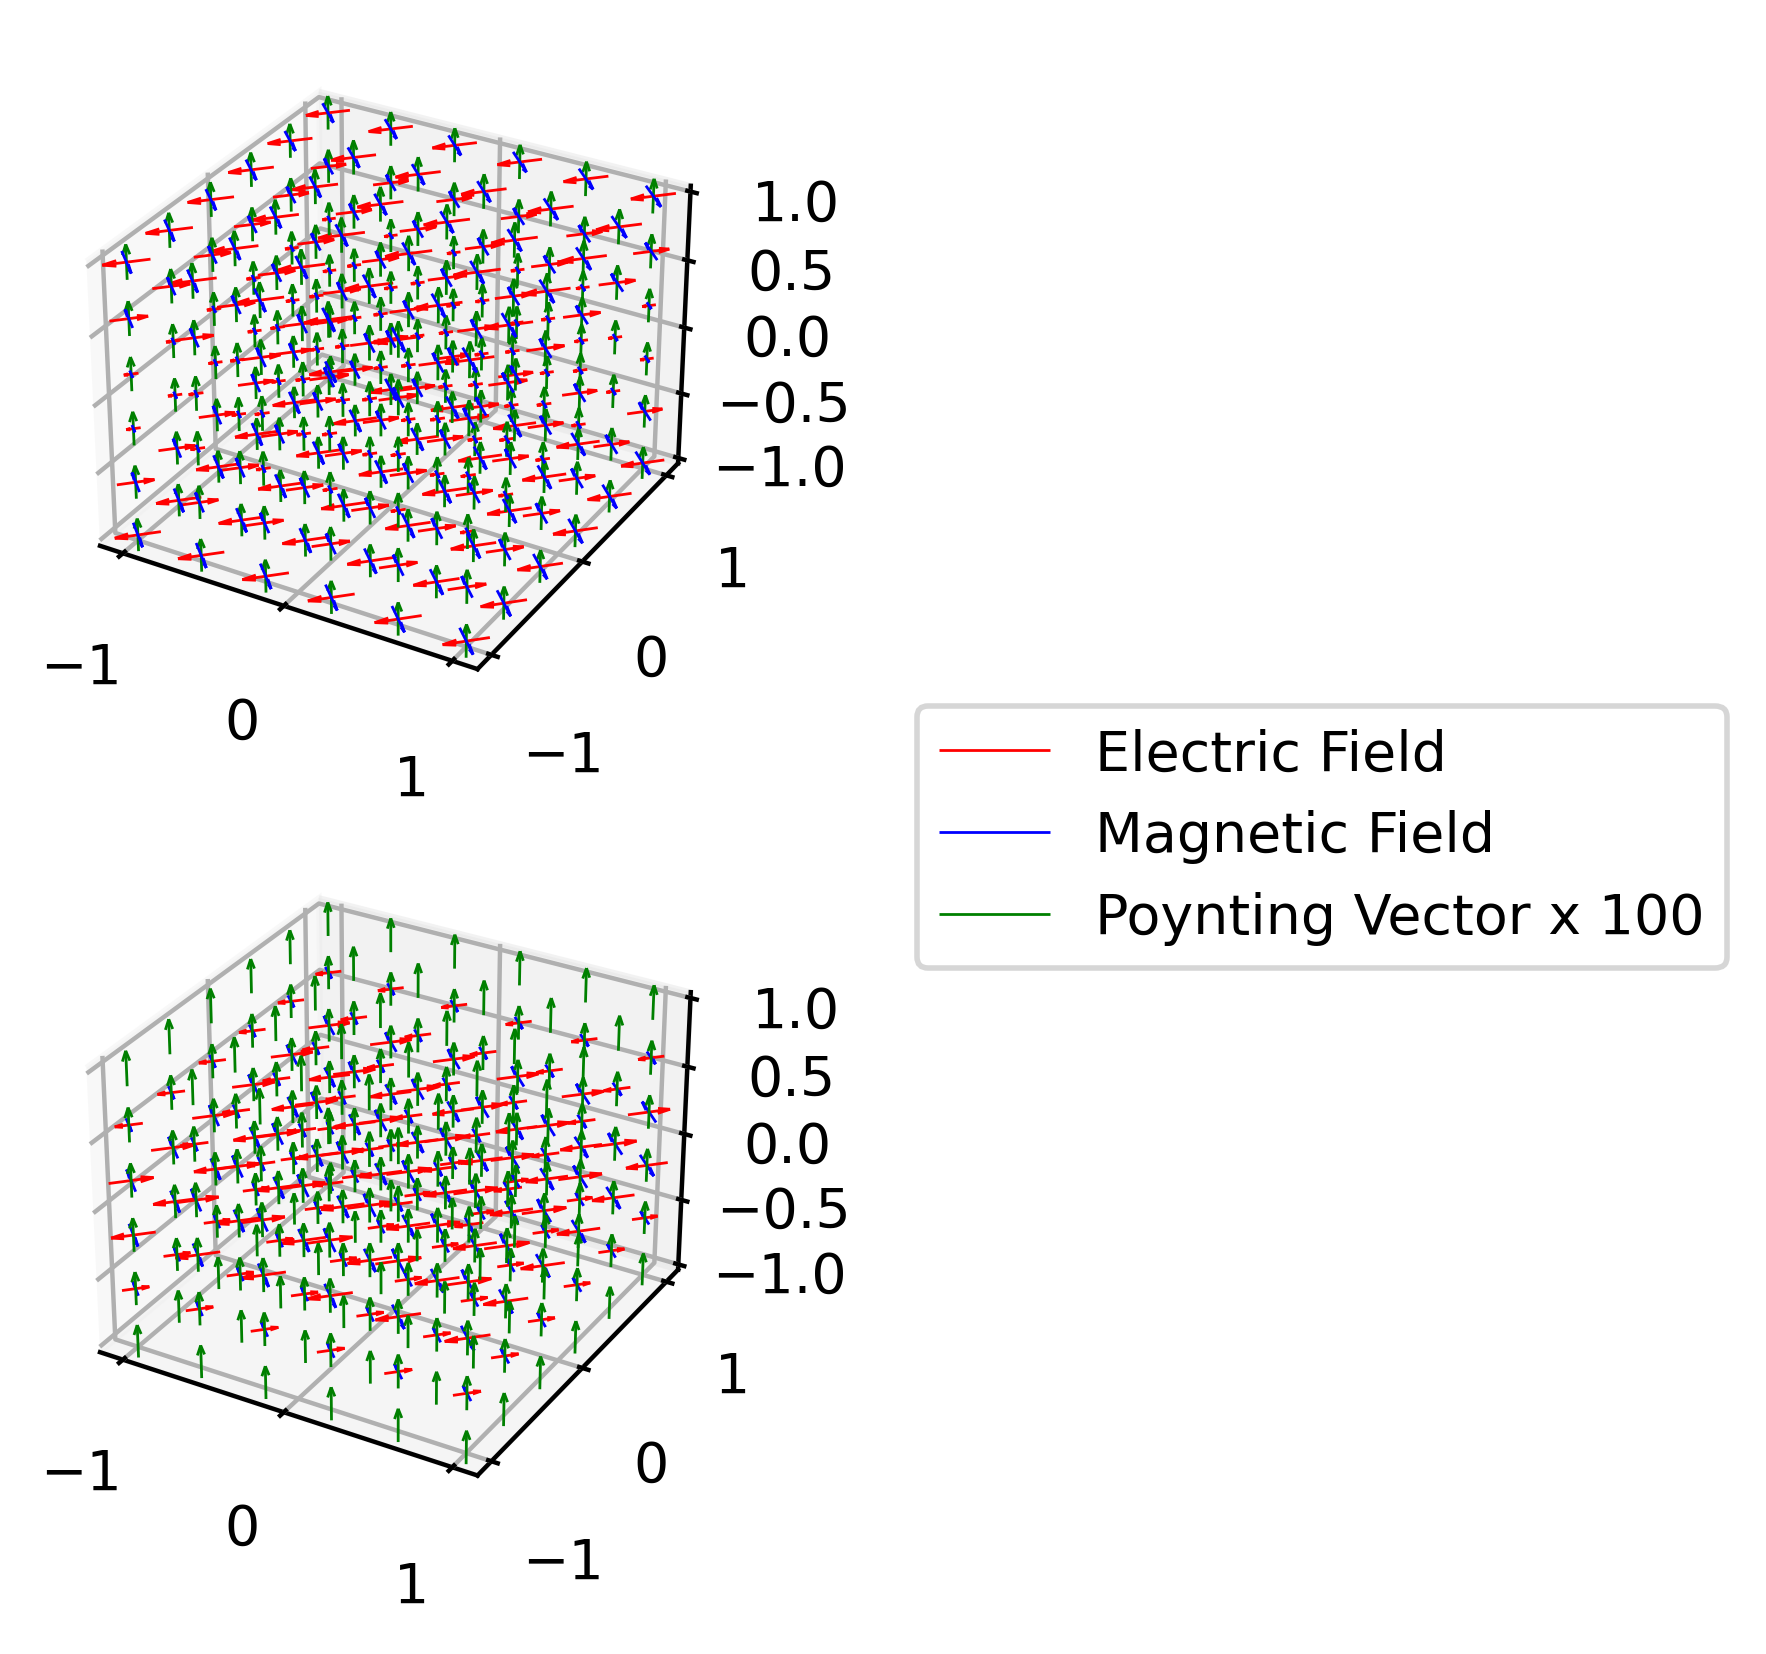

In [63]:
# Define the material.
mu = 1
epsilon = 1
n = np.sqrt(mu*epsilon)

# Define the wave vector.
# Give magnitude, lattitude, and longitdue.
k = 3 * np.pi
theta = 0.00 * np.pi
phi = 0.25 * np.pi

kx = k * np.sin(theta) * np.cos(phi)
ky = k * np.sin(theta) * np.sin(phi)
kz = k * np.cos(theta)

omega = k/n

# Set times for snapshots.
T = (2*np.pi) / omega
t0 = 0.00
t1 = t0 + 0.25*T

# Define the electric field, magnetic field, and Poynting vector
# for an electromagnetic plane wave.

# Give initial direction of electric field.
# Everything else is determined by this.
E0 = 0.25
B0 = np.sqrt(epsilon*mu) * E0

thetaE = 0.50 * np.pi
phiE = 0.25 * np.pi

Ex0 = E0 * np.sin(thetaE) * np.cos(phiE)
Ey0 = E0 * np.sin(thetaE) * np.sin(phiE)
Ez0 = E0 * np.cos(thetaE)

# Set phase difference between electric and magnetic fields.
alpha = 0.00 * np.pi

# Plot the results.
# Create a grid.
box_size = 1
num_points = 6

s = np.linspace(-box_size, box_size, num_points)
X, Y, Z = np.meshgrid(s,s,s)

# Create the figure.
fig = plt.figure(dpi=400)
ax1 = fig.add_subplot(211, projection='3d')
ax2 = fig.add_subplot(212, projection='3d')

# Compute the fields on a grid at the first time.
ex = Ex0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t0))
ey = Ey0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t0)) * np.exp(1j*alpha)
ez = Ez0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t0))

bx = (ky*ez - kz*ey)/omega
by = (kz*ex - kx*ez)/omega
bz = (kx*ey - ky*ex)/omega

sx = 1/(8*np.pi*mu) * (ey * bz.conj() - ez * by.conj())
sy = 1/(8*np.pi*mu) * (ez * bx.conj() - ex * bz.conj())
sz = 1/(8*np.pi*mu) * (ex * by.conj() - ey * bx.conj())

ax1.quiver3D(X,Y,Z, ex.real, ey.real, ez.real, pivot='middle',
             linewidth=0.5, color='red', label='Electric Field')
ax1.quiver3D(X,Y,Z, bx.real, by.real, bz.real, pivot='middle',
             linewidth=0.5, color='blue', label='Magnetic Field')
ax1.quiver3D(X,Y,Z, 100*sx.real, 100*sy.real, 100*sz.real, pivot='middle',
             linewidth=0.5, color='green', label='Poynting Vector x 100')

# Compute the fields on a grid at the second time.
ex = Ex0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t1))
ey = Ey0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t1)) * np.exp(1j*alpha)
ez = Ez0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t1))

bx = (ky*ez - kz*ey)/omega
by = (kz*ex - kx*ez)/omega
bz = (kx*ey - ky*ex)/omega

sx = 1/(8*np.pi) * (ey * bz.conj() - ez * by.conj())
sy = 1/(8*np.pi) * (ez * bx.conj() - ex * bz.conj())
sz = 1/(8*np.pi) * (ex * by.conj() - ey * bx.conj())

ax2.quiver3D(X,Y,Z, ex.real, ey.real, ez.real, pivot='middle',
             linewidth=0.5, color='red', label='Electric Field')
ax2.quiver3D(X,Y,Z, bx.real, by.real, bz.real, pivot='middle',
             linewidth=0.5, color='blue', label='Magnetic Field')
ax2.quiver3D(X,Y,Z, 100*sx.real, 100*sy.real, 100*sz.real, pivot='middle',
             linewidth=0.5, color='green', label='Poynting Vector x 100')
ax2.legend(bbox_to_anchor=(1.25, 1.25), loc='upper left')

Adjust the value of `t1` while keeping `t0` and the other parameters constant.

- What differences do you notice between the two plots as you adjust `t1`?

It seems to be rotating the field directions like if it was a rdiating EM wave through space with respect to time.

Adjust the direction of $\vec{k}$, as in the exercises above.  Observe the wave at different times.

- What differences do you notice between the two plots as you adjust `t1` and $\vec{k}$?

It appears that K is changing how fast the wave oscillates

In addition to changing the ***direction*** of $\vec{E}$, we can also change the ***relative phase*** of its components.  The code above allows us to describe waves of the form

\begin{align*}
Ex &= E_{x0} \, \cos \omega t \\
Ey &= E_{y0} \, \cos (\omega t + \alpha) \\
Ez &= E_{z0} \, \cos \omega t
\end{align*}

Reset $\vec{k}$ to point along the $z$-axis: $\theta = 0$ and $\phi = 0$.  Set $\alpha = \pi/2$.  Then, adjust the value of `t1` while keeping `t0` and the other parameters constant.

- What differences do you notice between the two plots as you adjust `t1`?
- How does $\alpha = \pi/2$ compare with $\alpha = 0$?

***Replace with your observations.***

Explore other values of $\alpha$ and `t1`.

- How does $\alpha$ affect the patterns you observe?

***Replace with your observations.***

# Electromagnetic Movies

Observing plane waves is instructive, but a movie can illustrate the behavior even better.

The following code will create a movie of a plane wave and display it in this notebook.  It may take a little while to run.

If you get an error regarding `ffmpeg` use `conda` to install it.  Open a terminal or the "Anaconda Prompt" and type
```
conda install --channel conda-forge ffmpeg
```

In [122]:
# Name of file to store movie.
num_frames = 500

## Define the electromagnetic wave and plot its initial configuration.
# Define the material.
mu = 1
epsilon = 1
n = np.sqrt(mu*epsilon)

# Define the wave vector.
# Give magnitude, lattitude, and longitdue.
k = 1.00 * np.pi
theta = 0.00 * np.pi
phi = 0.25 * np.pi

kx = k * np.sin(theta) * np.cos(phi)
ky = k * np.sin(theta) * np.sin(phi)
kz = k * np.cos(theta)

omega = k/n

# Set times for snapshots.
T = (2*np.pi) / omega
dt = T / 50
t0 = 0.00

# Define the electric field, magnetic field, and Poynting vector
# for an electromagnetic plane wave.

# Give initial direction of electric field.
# Everything else is determined by this.
E0 = 1
B0 = np.sqrt(epsilon*mu) * E0

thetaE = 0.50 * np.pi
phiE = 0.33 * np.pi

Ex0 = E0 * np.sin(thetaE) * np.cos(phiE)
Ey0 = E0 * np.sin(thetaE) * np.sin(phiE)
Ez0 = E0 * np.cos(thetaE)

# Set phase difference between electric and magnetic fields.
alpha = 0.50 * np.pi

In [123]:
# Create a grid.
L = 1
N = 5

# Define function to compute fields on a grid.
def compute_fields(n, box_size=L, num_points=N):
    t = t0 + n * dt
    
    s = np.linspace(-box_size, box_size, num_points)
    X, Y, Z = np.meshgrid(s,s,s)

    
    # Compute the fields on a grid at the initial time.
    ex = Ex0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t))
    ey = Ey0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t)) * np.exp(1j*alpha)
    ez = Ez0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t))
    
    bx = (ky*ez - kz*ey)/omega
    by = (kz*ex - kx*ez)/omega
    bz = (kx*ey - ky*ex)/omega
    
    sx = 1/(8*np.pi*mu) * (ey * bz.conj() - ez * by.conj())
    sy = 1/(8*np.pi*mu) * (ez * bx.conj() - ex * bz.conj())
    sz = 1/(8*np.pi*mu) * (ex * by.conj() - ey * bx.conj())
        
    return X, Y, Z, ex.real, ey.real, ez.real, bx.real, by.real, bz.real, sx.real, sy.real, sz.real


# Create a figure for each time step.
# It is essential that the frames be named in alphabetical order.
# {:03d} will display integers with three digits and insert zeros if needed:
# '000_movie.jpg', '001_movie.jpg', etc.
file_name = "{:03d}_movie.jpg"

# Generate frames and save each figure as a separate .jpg file.
for i in range(num_frames):
    # Update fields.
    X,Y,Z,ex,ey,ez,bx,by,bz,sx,sy,sz = compute_fields(i)

    ## Set up the plot.
    fig = plt.figure(dpi=400)
    ax = fig.add_subplot(projection='3d')
    ax.set(xlim3d=(-1.1, 1.1), xlabel='X')
    ax.set(ylim3d=(-1.1, 1.1), ylabel='Y')
    ax.set(zlim3d=(-1.1, 1.1), zlabel='Z')
    ax.view_init(40,25)

    e_quivers = ax.quiver(X,Y,Z, ex.real, ey.real, ez.real, pivot='middle',
                          linewidth=0.5, color='red', label='Electric Field')
    b_quivers = ax.quiver(X,Y,Z, bx.real, by.real, bz.real, pivot='middle',
                          linewidth=0.5, color='blue', label='Magnetic Field')
    s_quivers = ax.quiver(X,Y,Z, 100*sx.real, 100*sy.real, 100*sz.real, pivot='middle',
                          linewidth=0.5, color='green', label='Poynting Vector x 100')

    ax.legend(bbox_to_anchor=(0.7, 1.1), loc='upper left')
    
    plt.savefig(file_name.format(i))
    print("%s saved ..." % file_name.format(i))
    plt.close(fig)

000_movie.jpg saved ...
001_movie.jpg saved ...
002_movie.jpg saved ...
003_movie.jpg saved ...
004_movie.jpg saved ...
005_movie.jpg saved ...
006_movie.jpg saved ...
007_movie.jpg saved ...
008_movie.jpg saved ...
009_movie.jpg saved ...
010_movie.jpg saved ...
011_movie.jpg saved ...
012_movie.jpg saved ...
013_movie.jpg saved ...
014_movie.jpg saved ...
015_movie.jpg saved ...
016_movie.jpg saved ...
017_movie.jpg saved ...
018_movie.jpg saved ...
019_movie.jpg saved ...
020_movie.jpg saved ...
021_movie.jpg saved ...
022_movie.jpg saved ...
023_movie.jpg saved ...
024_movie.jpg saved ...
025_movie.jpg saved ...
026_movie.jpg saved ...
027_movie.jpg saved ...
028_movie.jpg saved ...
029_movie.jpg saved ...
030_movie.jpg saved ...
031_movie.jpg saved ...
032_movie.jpg saved ...
033_movie.jpg saved ...
034_movie.jpg saved ...
035_movie.jpg saved ...
036_movie.jpg saved ...
037_movie.jpg saved ...
038_movie.jpg saved ...
039_movie.jpg saved ...
040_movie.jpg saved ...
041_movie.jpg sa

342_movie.jpg saved ...
343_movie.jpg saved ...
344_movie.jpg saved ...
345_movie.jpg saved ...
346_movie.jpg saved ...
347_movie.jpg saved ...
348_movie.jpg saved ...
349_movie.jpg saved ...
350_movie.jpg saved ...
351_movie.jpg saved ...
352_movie.jpg saved ...
353_movie.jpg saved ...
354_movie.jpg saved ...
355_movie.jpg saved ...
356_movie.jpg saved ...
357_movie.jpg saved ...
358_movie.jpg saved ...
359_movie.jpg saved ...
360_movie.jpg saved ...
361_movie.jpg saved ...
362_movie.jpg saved ...
363_movie.jpg saved ...
364_movie.jpg saved ...
365_movie.jpg saved ...
366_movie.jpg saved ...
367_movie.jpg saved ...
368_movie.jpg saved ...
369_movie.jpg saved ...
370_movie.jpg saved ...
371_movie.jpg saved ...
372_movie.jpg saved ...
373_movie.jpg saved ...
374_movie.jpg saved ...
375_movie.jpg saved ...
376_movie.jpg saved ...
377_movie.jpg saved ...
378_movie.jpg saved ...
379_movie.jpg saved ...
380_movie.jpg saved ...
381_movie.jpg saved ...
382_movie.jpg saved ...
383_movie.jpg sa

In [124]:
!ffmpeg -y -i %03d_movie.jpg -pix_fmt yuv420p movie.mp4

ffmpeg version 4.4.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with clang version 14.0.4
  configuration: --prefix=/Users/user/opt/anaconda3/envs/Fenics --cc=arm64-apple-darwin20.0.0-clang --cxx=arm64-apple-darwin20.0.0-clang++ --nm=arm64-apple-darwin20.0.0-nm --ar=arm64-apple-darwin20.0.0-ar --disable-doc --disable-openssl --enable-avresample --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libfontconfig --enable-libopenh264 --enable-cross-compile --arch=arm64 --target-os=darwin --cross-prefix=arm64-apple-darwin20.0.0- --host-cc=/Users/runner/miniforge3/conda-bld/ffmpeg_1666357782715/_build_env/bin/x86_64-apple-darwin13.4.0-clang --enable-neon --enable-gnutls --enable-libmp3lame --enable-libvpx --enable-pthreads --enable-gpl --enable-libx264 --enable-libx265 --enable-libaom --enable-libsvtav1 --enable-libxml2 --enable-pic --enable-shared --disable-static --enable-version3 --enable-zlib --pkg-config=/Users/runner/miniforge3/conda-bld/ffmpeg_1666

In [121]:
# Play the movie within the notebook.
from IPython.display import HTML

HTML("""
    <video width="800" height="800" alt="test" controls>
        <source src=%s type="video/mp4">
    </video>
""" % "movie.mp4")

Even though it takes a while to create a video, play around with the field parameters and try to get an intuition for the kinds of electromagnetic fields associated with different polarizations ($\vec{E}_0$ and $\alpha$) and wave vectors ($\vec{k}$).

This is really cool, but it keeps breaking and i have to delete all of the old pictures each time to get it to play the video. Sometimes even after doing that and running it again, it seems to have an issue playing after its generated the images and built the movie. It just gives me a black screen. 


I was unable to test these different polarizations. I would still like to see this, is there a way to fix this issue?



- Give a set of parameters for an electromagnetic wave with **linear polarization**.
- Give a set of parameters for an electromagnetic wave with **circular polarization**.
- Give a set of parameters for an electromagnetic wave with **elliptical polarization**.

***Replace with your response.***

Why is it called an "electromagnetic plane wave"?

It is because at all times the wave is consatnt at any plane perpendicular to a direction.

# Reflection and Summary

- What are the major takeaways of this assignment for you?
- What was the most difficult part of this assignment?
- What was the most interesting part of this assignment?
- What questions do you have?

The key takeaways are how the EM wave travels through space, and how the different parameters of the wave effect it. 
The most dofficult part was interpeting the static graphs with the vectors. It is difficult to understand what Z height the vectors are at.
The most interesting part is actually seeing the notebook create the images and compile them into a moving representation. This is interesting for two reason, being able to see the movement of the wave, as well as potential uses for this outside of this specific application. 
How can i see the polarizations of the waves for this notebook? The movies keep breaking and it takes a very long time to get one that wants to play properly. 